# Project Overview:
we aim to predict the listing gains in the Indian IPO (Initial Public Offering) market using deep learning techniques with TensorFlow. Listing gains refer to the percenttage increase in the share price of company from its IPO issue prie on the day of listing.

# Dataset Overview:
* The dataset we will be using sourced from moneycontrol and contains information on past IPOs in the Indian market. It includes the following columns:
    * Date: date when the IPO was listed
    * IPOName: name of the IPO
    * Issue_Size: size of the IPO issue, in INR Crores
    * Subscription_QIB: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category
    * Subscription_HNI: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category
    * Subscription_RII: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category
    * Subscription_Total: total number of times the IPO was subscribed overall
    * Issue_Price: the price in INR at which the IPO was issued
    * Listing_Gains_Percent: is the percentage gain in the listing price over the issue price

# 1. Data Exploration

In [2]:
# Load the dataset

df = pd.read_csv('Indian_IPO_Market_Data.csv')

In [3]:
# Print the First five rows of the dataset

print('First five rows of the dataset:')
print(df.head())

First five rows of the dataset:
      Date           IPOName  Issue_Size  Subscription_QIB  Subscription_HNI  \
0  03/02/10    Infinite Comp      189.80             48.44            106.02   
1  08/02/10    Jubilant Food      328.70             59.39             51.95   
2  15/02/10    Syncom Health       56.25              0.99             16.60   
3  15/02/10  Vascon Engineer      199.80              1.12              3.65   
4  19/02/10      Thangamayil        0.00              0.52              1.52   

   Subscription_RII  Subscription_Total  Issue_Price  Listing_Gains_Percent  
0             11.08               43.22          165                  11.82  
1              3.79               31.11          145                 -84.21  
2              6.25                5.17           75                  17.13  
3              0.62                1.22          165                 -11.28  
4              2.26                1.12           75                  -5.20  


In [4]:
# Print the last five rows of the dataset

print('Last five rows of the dataset:')
print(df.tail())

Last five rows of the dataset:
        Date           IPOName  Issue_Size  Subscription_QIB  \
314  26/08/22        Syrma SGS      840.13             42.42   
315  06/09/22  Dreamfolks Serv      562.10             27.48   
316  15/09/22              TMB      792.00              0.51   
317  26/09/22  Harsha Engineer      755.00            113.82   
318  17/10/22  Electronics Mar      500.00             58.81   

     Subscription_HNI  Subscription_RII  Subscription_Total  Issue_Price  \
314              7.13              2.84               15.59          220   
315             14.18             24.19               23.25          326   
316              1.77              3.44                1.39          525   
317             40.36             12.44               47.19          330   
318             15.39              8.27               24.23           59   

     Listing_Gains_Percent  
314                  42.30  
315                  41.92  
316                  -3.15  
317        

In [5]:
# Print the shape of the data

print('Shape of the data:')
print(df.shape)

Shape of the data:
(319, 9)


In [6]:
# print information about the columns in the dataset

print('Information about the columns:')
print(df.info())

Information about the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB
None


In [7]:
# Print the summary statistics for the 'Listing_Gains_Percent' variable in the dataset

print('Summary statistics for Listing_Gains_Percent:')
print(df['Listing_Gains_Percent'].describe())

Summary statistics for Listing_Gains_Percent:
count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64


In [8]:
# Print the summary statistics for all variables of the dataset

print('Summary statistics for all variables:')
print(df.describe())

Summary statistics for all variables:
         Issue_Size  Subscription_QIB  Subscription_HNI  Subscription_RII  \
count    319.000000        319.000000        319.000000        319.000000   
mean    1192.859969         25.684138         70.091379          8.561599   
std     2384.643786         40.716782        142.454416         14.508670   
min        0.000000          0.000000          0.000000          0.000000   
25%      169.005000          1.150000          1.255000          1.275000   
50%      496.250000          4.940000          5.070000          3.420000   
75%     1100.000000         34.635000         62.095000          8.605000   
max    21000.000000        215.450000        958.070000        119.440000   

       Subscription_Total  Issue_Price  Listing_Gains_Percent  
count          319.000000   319.000000             319.000000  
mean            27.447147   375.128527               4.742696  
std             48.772203   353.897614              47.650946  
min         

### Observations:


 **Listing Gains:**
   - The 'Listing_Gains_Percent' column represents the percentage gain in the listing price over the issue price.
   - The mean listing gain is approximately 4.74%, with a standard deviation of 47.65%, indicating a wide range of listing gains.
   - The minimum and maximum listing gains are -97.15% and 270.40% respectively, indicating instances of both negative and high positive listing gains.

**Issue Size and Subscription:**
   - The 'Issue_Size' column represents the size of the IPO issue in INR Crores.
   - Subscription numbers for Qualified Institutional Buyers (QIB), High Networth Individuals (HNI), and Retail Individual Investors (RII) are provided in columns 'Subscription_QIB', 'Subscription_HNI', and 'Subscription_RII' respectively.
   - The 'Subscription_Total' column represents the total number of times the IPO was subscribed overall.

In [9]:
# Create a categorical target variable, Listing_Gains_Profit

df['Listing_Gains_Profit'] = np.where(df['Listing_Gains_Percent'] > 0, 1, 0)
print(df.head())

      Date           IPOName  Issue_Size  Subscription_QIB  Subscription_HNI  \
0  03/02/10    Infinite Comp      189.80             48.44            106.02   
1  08/02/10    Jubilant Food      328.70             59.39             51.95   
2  15/02/10    Syncom Health       56.25              0.99             16.60   
3  15/02/10  Vascon Engineer      199.80              1.12              3.65   
4  19/02/10      Thangamayil        0.00              0.52              1.52   

   Subscription_RII  Subscription_Total  Issue_Price  Listing_Gains_Percent  \
0             11.08               43.22          165                  11.82   
1              3.79               31.11          145                 -84.21   
2              6.25                5.17           75                  17.13   
3              0.62                1.22          165                 -11.28   
4              2.26                1.12           75                  -5.20   

   Listing_Gains_Profit  
0                 

In [10]:
# Check for missing values in any of the columns

print('Missing values in the dataset:')
print(df.isnull().sum())

Missing values in the dataset:
Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
Listing_Gains_Profit     0
dtype: int64


In [11]:
# Summary statistics for variable to determine which ones to use for modeling

print('Summary statistics for variables:')
print(df.describe())

Summary statistics for variables:
         Issue_Size  Subscription_QIB  Subscription_HNI  Subscription_RII  \
count    319.000000        319.000000        319.000000        319.000000   
mean    1192.859969         25.684138         70.091379          8.561599   
std     2384.643786         40.716782        142.454416         14.508670   
min        0.000000          0.000000          0.000000          0.000000   
25%      169.005000          1.150000          1.255000          1.275000   
50%      496.250000          4.940000          5.070000          3.420000   
75%     1100.000000         34.635000         62.095000          8.605000   
max    21000.000000        215.450000        958.070000        119.440000   

       Subscription_Total  Issue_Price  Listing_Gains_Percent  \
count          319.000000   319.000000             319.000000   
mean            27.447147   375.128527               4.742696   
std             48.772203   353.897614              47.650946   
min         

### Observations
* We observed that the mean 'Listing_Gains_Percent' is approximately 4.74%, with a standard deviation of 47.64%. The mininum and maxinum listing gains are -97.15% and 270.40% respectively.
* The 'Listing_Gains_Profit' variable has a mean of approximately 0.55, indicating that slightly more than half of the IPOs listed at a profit.

In [12]:
# Distribution of the target variable

print('Distribution of the target variable (Listing_Gains_Profit):')
print(df['Listing_Gains_Profit'].value_counts())

Distribution of the target variable (Listing_Gains_Profit):
1    174
0    145
Name: Listing_Gains_Profit, dtype: int64


### Observations:
* The distribution of the target variable, 'Listing_Gains_Profit', shows that out of 319 IPOs, 174 IPOs listed at a profit(1) and 145 IPOs did not list at a profit(0).

In [13]:
# Calculate the percentage of IPOs listed at a profit

profit_percentage = (df['Listing_Gains_Profit'].value_counts()[1]/ len(df)) * 100
print('Percentage of IPOs listed at a profit:',profit_percentage)

Percentage of IPOs listed at a profit: 54.54545454545454


### Observations:
* Approximately 54.55% of the IPOs listed at a profit based on the provided dataset.

# 2. Data Visualization

#### Visualization 1: Distribution of the target variable

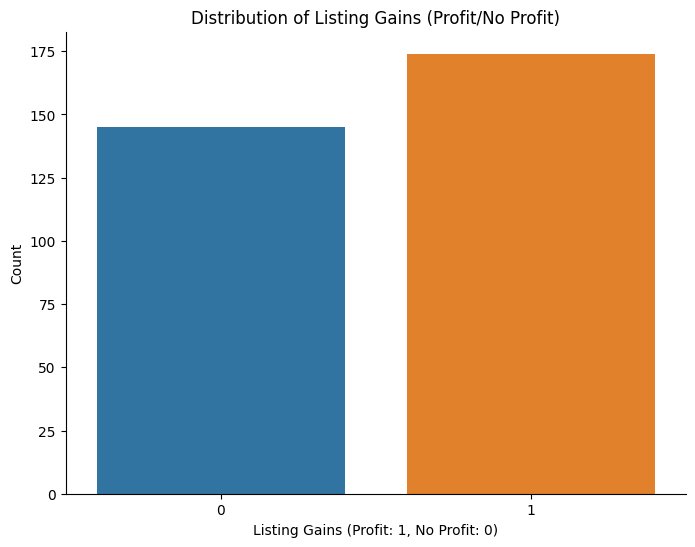

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Listing_Gains_Profit', data=df)
plt.title('Distribution of Listing Gains (Profit/No Profit)')
plt.xlabel('Listing Gains (Profit: 1, No Profit: 0)')
plt.ylabel('Count')
sns.despine()
plt.show()

#### Visualization 2: Boxplots for continuous variable to check for outliers

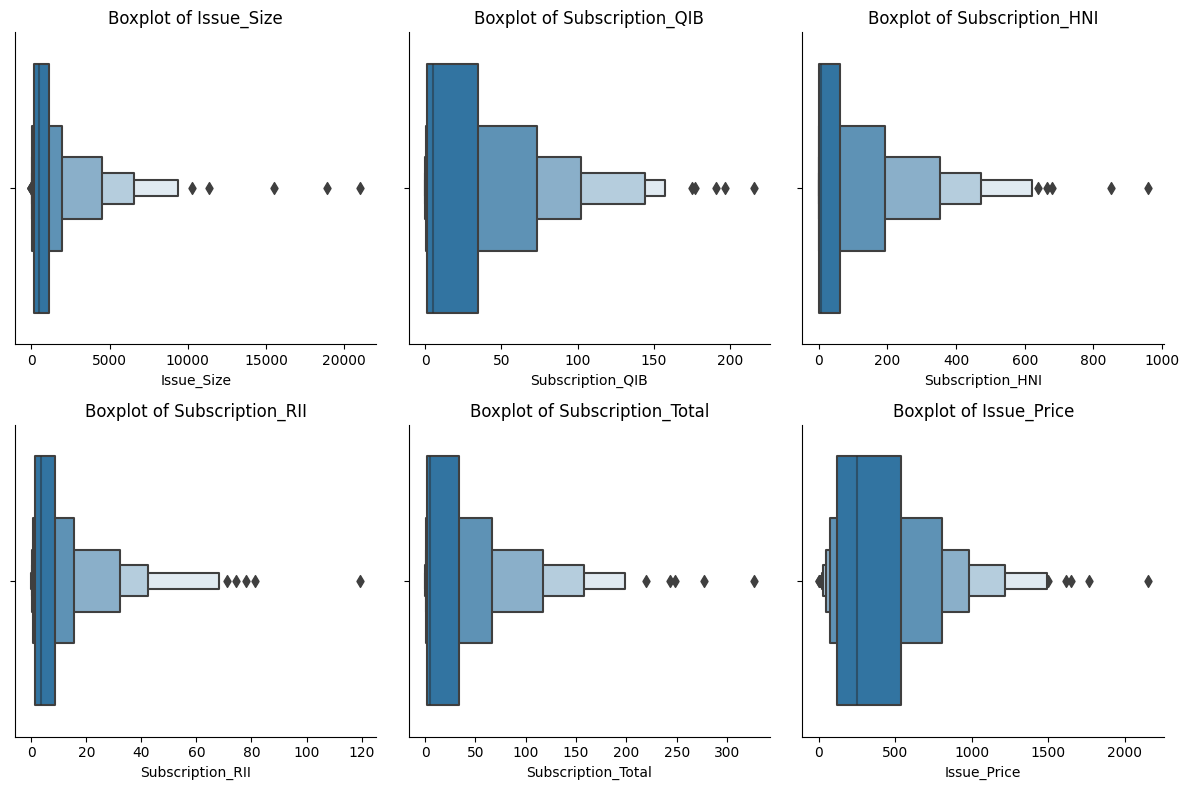

In [15]:
# List of continuous variables
continuous_variables = ['Issue_Size' , 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII' , 'Subscription_Total', 'Issue_Price']

# Define the size of the subplot grid
num_rows = 2
num_cols = 3

# Create a new figure
plt.figure(figsize=(12,8))

# Loop through each continuous variable and create a boxplot
for i, var in enumerate(continuous_variables, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxenplot(x = var, data = df)
    plt.title(f'Boxplot of {var}')
    
# Adjust layout and display the plot
sns.despine()
plt.tight_layout()
plt.show()

#### Visualization 3: Relationship between predictor variables and target variable

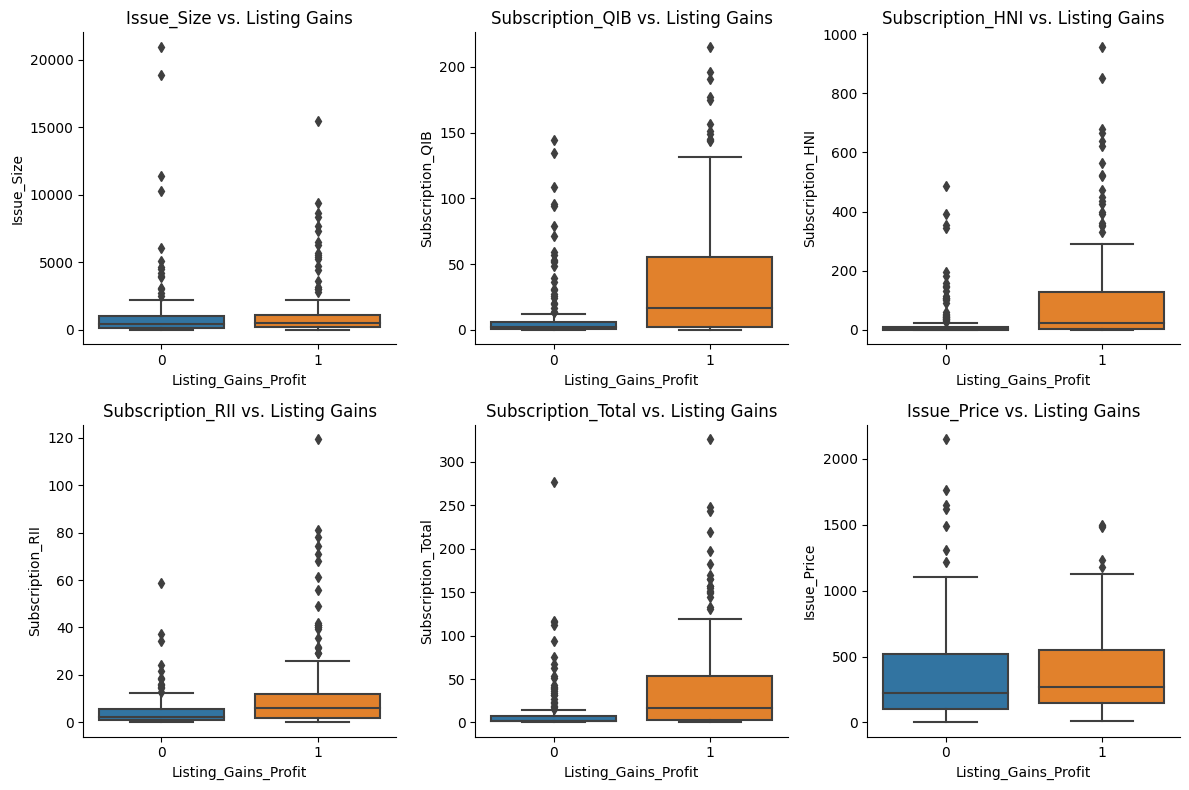

In [16]:
# List of predictor variables
predictor_variables = ['Issue_Size' , 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII' , 'Subscription_Total', 'Issue_Price']

# Define the size of the subplot grid
num_rows = 2
num_cols = 3

plt.figure(figsize=(12,8))

# Loop through each predictor variable and create a boxplot
for i, var in enumerate(predictor_variables, start = 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x = 'Listing_Gains_Profit', y = var, data = df)
    plt.title(f'{var} vs. Listing Gains')
    
# Adjust layout and display the plot
sns.despine()
plt.tight_layout()
plt.show()

### Observations:
* Boxplots comparing predictor variables with the target variable segmented by listing gains provided insights into variable distributions for profitable and non-profitable IPOs.
* For instance, higher subscription rates and issue price seem to correlate with listing gains.

#### Visualization 4: Correlation heatmap for predictor variables

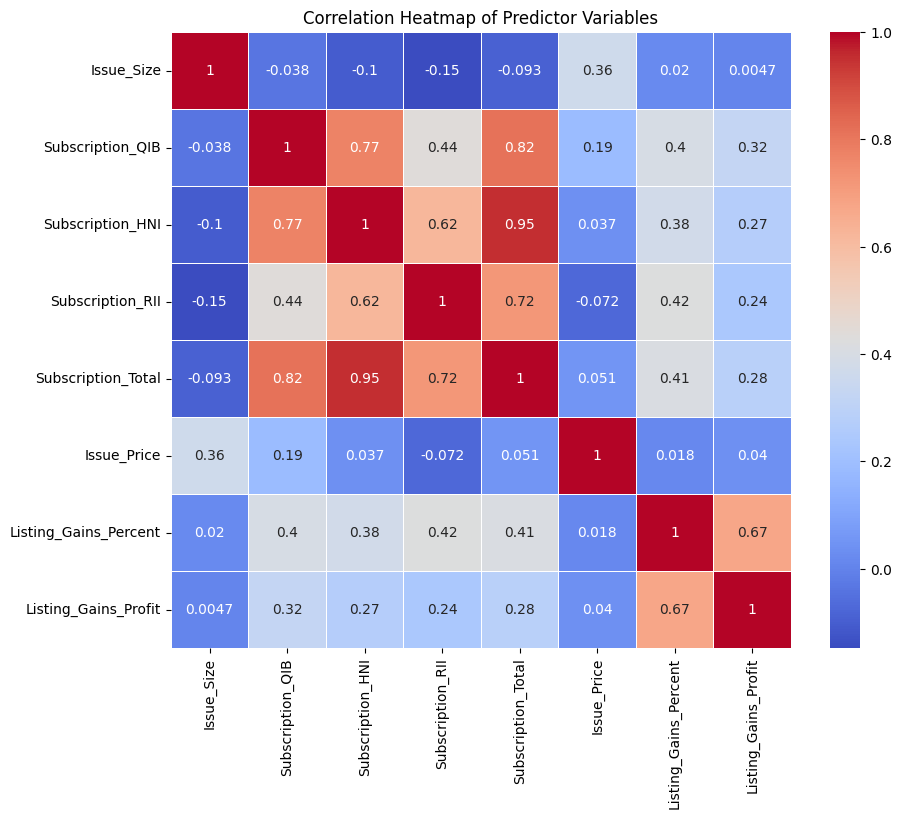

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

### Observations:

#### **Strong Positive Correlations:**
* There are strong positive correlations observed between certain pairs of predictor variables.
* There is notable strong positive correlation **(0.95)** between **'Subscription_Total'** and **'Subscription_HNI'**, another strong positive correlation **(0.82)** betwwen **'Subscription_Total'** and **'Subscription_QBI'**, and with positive correlation **(0.72)** between **'Subscription_Total'** and **'Subscription_RII'**.

#### **Moderate Positive Correlations:**
* Several pairs of predictor variables exhibit moderate positive correlations. For instance, there is moderate positive correlation **(0.67)** between **'Listing_Gains_Percent'** and **'Listing_Gains_Profit'**, another moderate positive correlations **(0.62)** between **'Subscription_RII'** and **'Subscription_HNI'**, moderate positive correlations **(0.44)** between **'Subscription_RII'** and **'Subscription_QBI'**.

#### **Multicolinearity:**
* The heatmap indicates the presence of multicolinearity between **'Subscription_Total'** and **'Subscription_HNI'** variables. 

# 3. Outlier Treatment

#### Identify numerical variable with outliers

In [18]:
numerical_variables = ['Issue_Size' , 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII' , 'Subscription_Total', 'Issue_Price']

# Calculate skewness for each numerical variable
skewness = df[numerical_variables].skew()

# Calculate IQR for each numerical variable
Q1 = df[numerical_variables].quantile(0.25)
Q3 = df[numerical_variables].quantile(0.25)
IQR = Q3 - Q1

# Variable with skewness or IQR outside thresholds are considered to have outliers
outlier_variables = skewness[abs(skewness) > 1]

# Display variables with outliers
print('Variables with outliers: ')
print(outlier_variables)

Variables with outliers: 
Issue_Size            4.853402
Subscription_QIB      2.143705
Subscription_HNI      3.078445
Subscription_RII      3.708274
Subscription_Total    2.911907
Issue_Price           1.696881
dtype: float64


### Observations:
* Skewness values **greater than 1** indicate a significant departure from symmetry, suggesting the **presence of outliers** or **non-normal distribution**.

#### Outlier Treatment

In [19]:
for var in outlier_variables.index:
    # Calculate the lower and upper bounds
    lower_bound = Q1[var] - 1.5*IQR[var]
    upper_bound = Q3[var] + 1.5*IQR[var]
    
    # Replace outliers with lower or upper bounds
    df[var] = np.where(df[var] < lower_bound, lower_bound, df[var])
    df[var] = np.where(df[var] > upper_bound, upper_bound, df[var])    

#### Visual Inspection

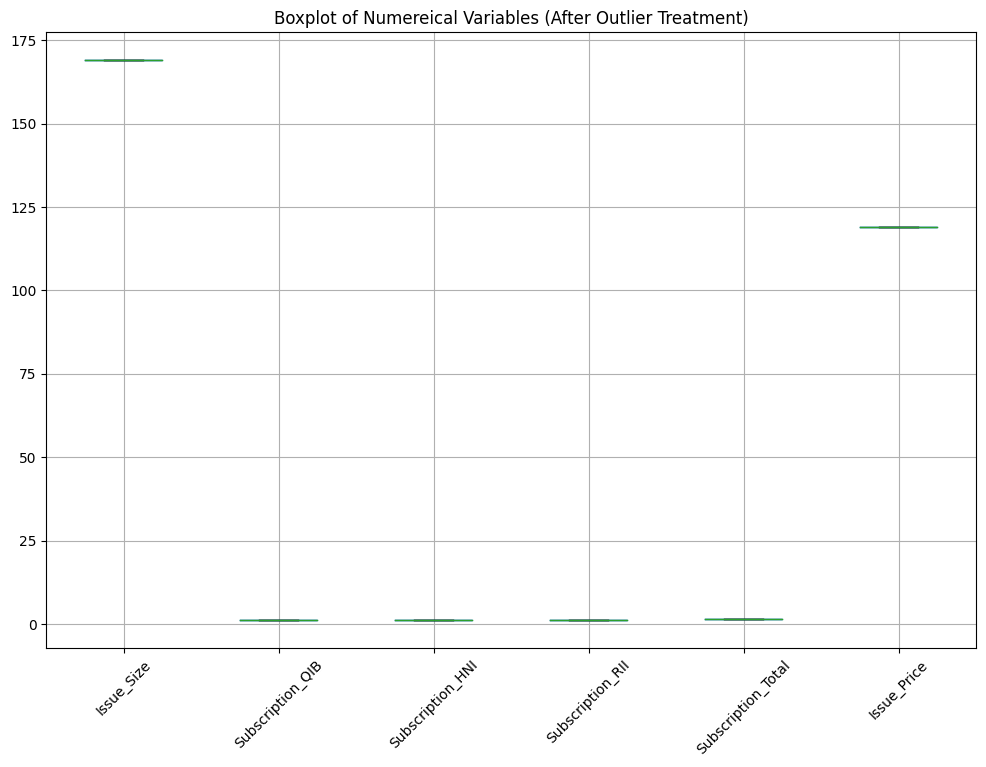

In [20]:
plt.figure(figsize=(12,8))
df[numerical_variables].boxplot()
plt.title('Boxplot of Numereical Variables (After Outlier Treatment)')
plt.xticks(rotation=45)
plt.show()

#### Summary Statistics

In [21]:
print('Summary Statistics (After Outlier Treatment): \n', df[numerical_variables].describe())

Summary Statistics (After Outlier Treatment): 
          Issue_Size  Subscription_QIB  Subscription_HNI  Subscription_RII  \
count  3.190000e+02      3.190000e+02      3.190000e+02      3.190000e+02   
mean   1.690050e+02      1.150000e+00      1.255000e+00      1.275000e+00   
std    8.255245e-13      4.003082e-15      3.558295e-15      6.004623e-15   
min    1.690050e+02      1.150000e+00      1.255000e+00      1.275000e+00   
25%    1.690050e+02      1.150000e+00      1.255000e+00      1.275000e+00   
50%    1.690050e+02      1.150000e+00      1.255000e+00      1.275000e+00   
75%    1.690050e+02      1.150000e+00      1.255000e+00      1.275000e+00   
max    1.690050e+02      1.150000e+00      1.255000e+00      1.275000e+00   

       Subscription_Total  Issue_Price  
count        3.190000e+02        319.0  
mean         1.645000e+00        119.0  
std          7.116591e-15          0.0  
min          1.645000e+00        119.0  
25%          1.645000e+00        119.0  
50%         

### Observations:
* After outlier treatment, the summary statistics for all numerical variables indicate uniformity with **very low Standard Deviation**.
* The IQR(Interquartile Range) for each variable appears to have collapsed to very small range, indicating the absence of outliers.

#### Skewness and Kurtosis

In [22]:
print('Skewness (After Outlier Treatment):\n',df[numerical_variables].skew())

Skewness (After Outlier Treatment):
 Issue_Size            0.0
Subscription_QIB      0.0
Subscription_HNI      0.0
Subscription_RII      0.0
Subscription_Total    0.0
Issue_Price           0.0
dtype: float64


In [23]:
print('Kurtosis (After Outlier Treatment):\n',df[numerical_variables].kurtosis())

Kurtosis (After Outlier Treatment):
 Issue_Size            0.0
Subscription_QIB      0.0
Subscription_HNI      0.0
Subscription_RII      0.0
Subscription_Total    0.0
Issue_Price           0.0
dtype: float64


### Observations:
* After outliers treatment, the **skewness** and **kurtosis** values for all numerical variables are **0**.
* Skewness measures the asymmetry of the distribution. A skewness of **0** indicates a **perfectly symmetrical distribution**.
* Kurtosis measures the tail heaviness of the the distribution. A kurtosis of **0** indicates a **normal distribution**.

#### Checking the Outerliers (After Outlier Treatment)

In [24]:
def detect_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3- q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr    
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

outliers_detected_iqr = {}
for var in numerical_variables:
    outliers_iqr = detect_outliers_iqr(df[var])
    outliers_detected_iqr[var] = outliers_iqr
    
for var, outliers in outliers_detected_iqr.items():
    if outliers.any():
        print(f'{var}: Outliers Detected')
    else:
        print(f'{var}: No Outliers Detected')

Issue_Size: No Outliers Detected
Subscription_QIB: No Outliers Detected
Subscription_HNI: No Outliers Detected
Subscription_RII: No Outliers Detected
Subscription_Total: No Outliers Detected
Issue_Price: No Outliers Detected


### Observations:
* The output indicates that after applying the outlier treatmnt using the Interquartile Range(IQR) method, no outliers were detected in any of the numerical variables.

# 4.  Setting the Target and Predictor Variables

#### Create Arrays of Target and Predictor Variables

In [25]:
# Array of the target variable (dependent variable)
target_variable = df['Listing_Gains_Profit'].values

# Array of the predictor variables (independent variables)
predictor_variable = df.drop(columns=['Listing_Gains_Profit', 'IPOName', 'Date '], axis=1).values

#### Perform Normalization on Predictor Variables

In [26]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on predictor variables
predictor_variables_normalized = scaler.fit_transform(predictor_variable)

#### Summary Statistics after Normalization

In [27]:
# Convert normalized predictor variable array back to DataFrame for summary statistics
df_normalized = pd.DataFrame(predictor_variables_normalized, columns = df.columns[2:-1])

# Summary statistics for normalized predictor variables
print('Summary Statistics (After Normalization):')
print(df_normalized.describe())

Summary Statistics (After Normalization):
       Issue_Size  Subscription_QIB  Subscription_HNI  Subscription_RII  \
count       319.0             319.0             319.0             319.0   
mean          0.0               0.0               0.0               0.0   
std           0.0               0.0               0.0               0.0   
min           0.0               0.0               0.0               0.0   
25%           0.0               0.0               0.0               0.0   
50%           0.0               0.0               0.0               0.0   
75%           0.0               0.0               0.0               0.0   
max           0.0               0.0               0.0               0.0   

       Subscription_Total  Issue_Price  Listing_Gains_Percent  
count               319.0        319.0             319.000000  
mean                  0.0          0.0               0.277221  
std                   0.0          0.0               0.129645  
min                   0.0 

### Observations:
* Afetr normalization, all predictor variables have mean and standard deviation close to zero, indicating a uniform scale between 0 and 1.
* Minimun and maximun values for each predictor variable fall within the range 0 and 1, ensuring consistency across variables.
* 'Listing_Gains_Percent' remains unchanged as the target variable, with values representing actual listing gains percentages.

# 5. Setting up Holdout Validation Approach

#### Decide Proportion for Training and Testing

In [28]:
# Proportion for training set
train_proportion = 0.7

* Chosen proportion for the training set is 70%, leaving 30% for testing.

#### Creating Training and Testing sets

In [29]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictor_variable, target_variable, test_size=1-train_proportion, random_state=42)

In [30]:
# Display shapes of Training and Testing sets
print('Shape of Training set: ',X_train.shape, y_train.shape)
print('Shape of Testing set: ',X_test.shape, y_test.shape)

Shape of Training set:  (223, 7) (223,)
Shape of Testing set:  (96, 7) (96,)


* Training set contains 255 observations and testing set contains 64 observations.

# 6. Defining the Deep Learning Classification Model

In [31]:
# Instantiate a sequential model
model = Sequential()

2024-03-21 19:54:43.835465: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-03-21 19:54:43.835719: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 470.199.2 does not match DSO version 470.161.3 -- cannot find working devices in this configuration


#### Adding Layers

In [32]:
# Adding hidden layer
tf.random.set_seed(100)

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

* Added a hidden layer with 64 nodes and ReLU activation function.
* Input shape is defined based on the numper of features in the traning data.
* Added an output layer with 1 node for binary classification.
* Used sigmoid activation function for binary classification tasks.

# 7. Compiling and Training the Model

In [33]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

* Compiled the model with Adam optimizer, binary crossentropy loss function, and accuracy as the evaluation metric.
* Adam optimizer is a popular choice for deep learning tasks, and binary crossentropy is suitable for binary classification problems.

In [34]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Fit the model on training data
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 2.6751 - accuracy: 0.5964
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7265
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.6861
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8027
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8565
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8386
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8520
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8610
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.9058
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.9013


# 8. Model Evaluation

In [36]:
# Evaluate the model on train dataset
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print('Train Loss: ',train_loss)
print('Train Accuracy: ',train_accuracy)

Train Loss:  0.36011257767677307
Train Accuracy:  0.8609865307807922


In [37]:
# Evaluate the model on train dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

Test Loss:  0.48106300830841064
Test Accuracy:  0.78125


### Observations:
* Compare the training and testing accuracies. If the training accuracy is significantly higher than than the testing accuracy, it might indicate Overfitting.

### Adding more hidden layer to avoid Overfitting

In [38]:
model_2 = Sequential()

model_2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

model_2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(Dropout(0.2))
model_2.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model_2.fit(X_train, y_train, epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 20.4766 - accuracy: 0.4305
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 7.5309 - accuracy: 0.4664
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 5.6513 - accuracy: 0.5516
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 3.4638 - accuracy: 0.6592
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 2.5085 - accuracy: 0.6771
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9422 - accuracy: 0.7130
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 1.8645 - accuracy: 0.7668
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 1.7370 - accuracy: 0.7758
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 1.7262 - accuracy: 0.7354
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 1.3722 - accuracy: 0.8161


In [39]:
# Evaluate the second model on train dataset
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, y_train, verbose=0)
print('Train Loss(Model 2): ',train_loss_2)
print('Train Accuracy(Model 2): ',train_accuracy_2)

Train Loss(Model 2):  0.596852719783783
Train Accuracy(Model 2):  0.9461883306503296


In [40]:
# Evaluate the model on train dataset
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test Loss(Model 2): ',test_loss_2)
print('Test Accuracy(Model 2): ',test_accuracy_2)

Test Loss(Model 2):  0.6002178192138672
Test Accuracy(Model 2):  0.96875


### Results:

1. **Training Loss and Accuracy (Model 2):**
   - Train Loss(Model 2): 0.5968
   - Train Accuracy(Model 2): 0.9462
   - The training loss indicates the average loss over all training samples, which is approximately 0.58. 
   - The training accuracy of the model is around 94.62%, indicating that the model correctly predicts the target variable for nearly 94.62% of the training data.

2. **Testing Loss and Accuracy (Model 2):**
   - Test Loss(Model 2): 0.6002
   - Test Accuracy(Model 2): 0.9688
   - The testing loss, which measures the performance of the model on unseen data, is approximately 0.60.
   - The testing accuracy of the model is around 96.88%, indicating that the model correctly predicts the target variable for nearly 96.88% of the testing data.

3. **Comparison:**
   - The testing accuracy of Model 2 is slightly higher than its training accuracy, which suggests that the model generalizes well to unseen data.
   - Both training and testing accuracies are high, indicating that the model is performing well and effectively capturing the underlying patterns in the data.
   - The testing loss is slightly higher than the training loss, which is expected as the model has not seen the testing data during training.

4. **Overall:**
   - Model 2 demonstrates good performance on both the training and testing datasets, with high accuracy and relatively low loss values.
   - There is no significant indication of overfitting, as the testing accuracy is comparable to the training accuracy.
   - The model seems to generalize well to unseen data, making it suitable for making predictions on new IPO data.